<a href="https://colab.research.google.com/github/krauseannelize/nb-py-ms-exercises/blob/sprint05/notebooks/s05_pandas_eda/45_univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 45 | Univariate Analysis

**Exploratory Data Analysis (EDA)** is a technique for examining datasets focusing on summarizing data, identifying patterns, and discovering relationships using visual and statistical methods.

**Univariate Analysis** is a type of EDA that explores only one variable at a time. It does not deal with causes or relationships and has no dependant variables. This step is often the foundation before moving into bivariate or multivariate analysis.

## Basic Statistics

| Method | Description |
| --- | --- |
| **Mean** | The average of a dataset, calculated as the sum of all values divided by the number of values |
| **Median** | The middle value of a dataset when ordered; if even, it's the average of the two middle values |
| **Mode** | The most frequently occurring value(s) in a dataset |
| **Variance** | A measure of data spread, calculated as the average of the squared differences from the mean |
| **Standard Deviation (std)** | The square root of variance, indicating how much data deviates from the mean |
| **Min** | The smallest value in a dataset |
| **Max** | The largest value in a dataset |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import numpy as np  # Import numpy for statistical calculations
from collections import Counter  # Import Counter to calculate the mode manually

# Load the 'mpg' dataset from seaborn
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Example Calculations

Below are Python code examples that demonstrate how to calculate these basic statistics using the `mpg` column from the dataset.

In [ ]:
# Calculate the mean (average) of the 'mpg' column
mean_value = df['mpg'].mean()
print("Mean of MPG:", mean_value)

# Calculate the median of the 'mpg' column
median_value = df['mpg'].median()
print("Median of MPG:", median_value)

# Calculate the mode of the 'mpg' column using Counter
mode_counts = Counter(df['mpg'].dropna())  # Remove NaN values before counting
mode_value = mode_counts.most_common(1)[0][0]  # Get the most frequent value
print("Mode of MPG:", mode_value)

# Calculate the variance of the 'mpg' column (ddof=1 for sample variance)
variance_value = np.var(df['mpg'], ddof=1)
print("Variance of MPG:", variance_value)

# Calculate the standard deviation of the 'mpg' column (ddof=1 for sample standard deviation)
std_value = np.std(df['mpg'], ddof=1)
print("Standard Deviation of MPG:", std_value)

# Calculate the minimum and maximum values of the 'mpg' column
min_value = df['mpg'].min()
max_value = df['mpg'].max()
print("Minimum MPG:", min_value)
print("Maximum MPG:", max_value)

Mean of MPG: 23.514572864321607
Median of MPG: 23.0
Mode of MPG: 13.0
Variance of MPG: 61.089610774274405
Standard Deviation of MPG: 7.815984312565782
Minimum MPG: 9.0
Maximum MPG: 46.6


### Alternative Ways to Calculate the Mode

There are multiple ways to compute the mode in Python. Both of the following approaches return the same result:

In [ ]:
# Using Counter
mode_counts.most_common(1)[0][0]

13.0

In [ ]:
# Using pandas value_counts()
df['mpg'].dropna().value_counts().index[0]

np.float64(13.0)

### Using `describe()` for a Quick Summary

While we calculated each statistic individually above, pandas also provides the `describe()` method, which generates a quick summary of key descriptive statistics for a column or entire DataFrame. This is a convenient way to get an overview at once.

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Histograms

A **histogram** helps visualize the distribution of a single variable, identifying skewness, outliers, modes (peaks), and spread, making it useful for understanding central tendencies and variability in data.

| Parameter | Description |
| --- | --- |
| **Bins (Intervals)** | Ranges of values that group data points together |
| **Bars** | Rectangles representing the frequency of values within each bin |
| **X-axis** | Represents the range of values in the dataset |
| **Y-axis** | Shows the frequency (count) of data points in each bin |
| **Bin Width** | The size of each interval, affecting the histogram’s granularity |
| **Peaks (Modes)** | Represent the most frequent values or ranges in the dataset |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import matplotlib.pyplot as plt  # Import matplotlib for visualization

### Histogram Visualization

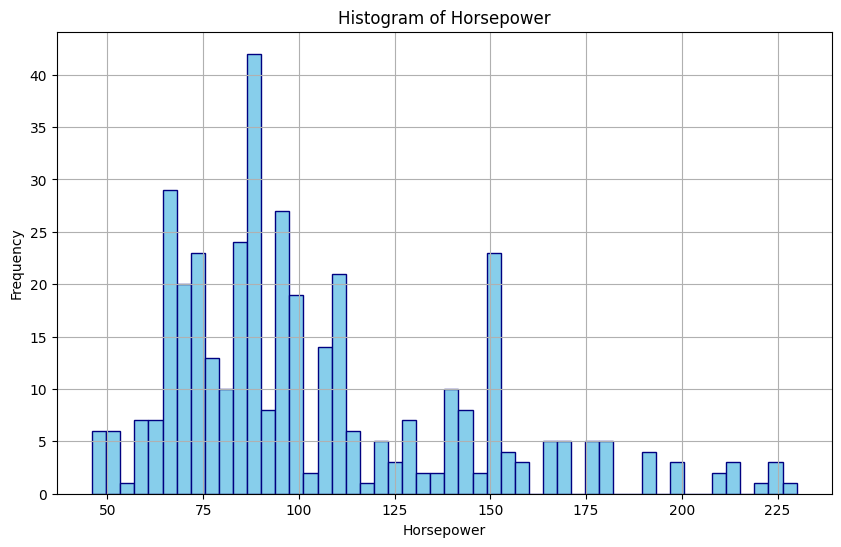

In [ ]:
# Create a histogram for the 'horsepower' column
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df['horsepower'].dropna(), bins=50, edgecolor='navy', color='skyblue')  # Plot histogram removing NaN values
plt.xlabel('Horsepower')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Histogram of Horsepower')  # Title of the histogram
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the histogram

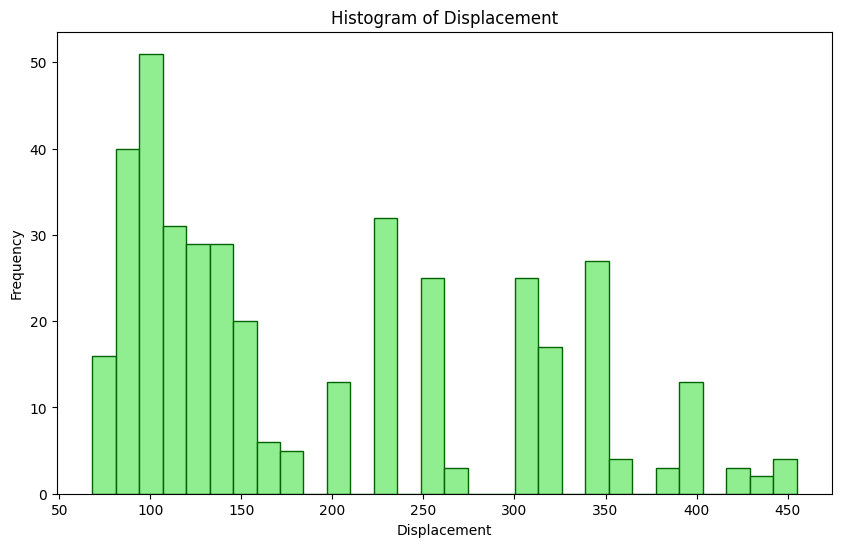

In [ ]:
# Create a histogram for the 'displacement' column
plt.figure(figsize=(10, 6))  # Set figure size
plt.hist(df['displacement'].dropna(), bins=30, edgecolor='darkgreen', color='lightgreen')  # Plot histogram removing NaN values
plt.xlabel('Displacement')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Histogram of Displacement')  # Title of the histogram
plt.grid(False)  # Add grid for better readability
plt.show()  # Display the histogram

## Density Plot

A **density plot** helps visualize the **probability distribution** of a variable, making it easier to detect **peaks (modes)**, **skewness**, and **spread** without the binning limitations of a histogram. It’s especially useful for comparing multiple distributions in a single plot.

| Parameter | Description |
| --- | --- |
| **X-axis** | Represents the range of values in the dataset |
| **Y-axis** | Represents the estimated probability density, showing how data points are distributed |
| **Smooth Curve** | A continuous line that represents the density of data across the range, often created using kernel density estimation (KDE) |
| **Bandwidth** | Controls the smoothness of the curve; a smaller bandwidth makes the plot more sensitive to individual data points, while a larger one smooths it out |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import matplotlib.pyplot as plt  # Import matplotlib for visualization

### Histogram Visualization

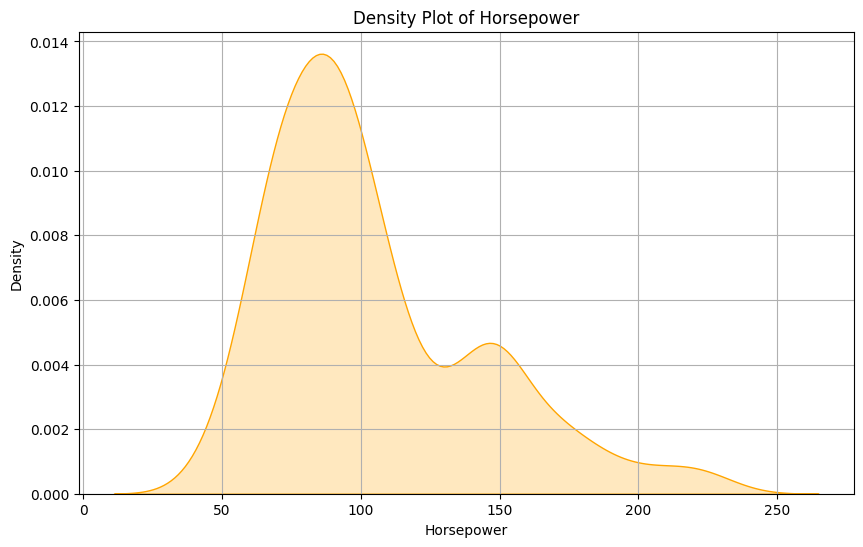

In [ ]:
# Create a density plot for the 'horsepower' column
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(df['horsepower'].dropna(), fill=True, color='orange')  # Kernel Density Estimation plot removing NaN values
plt.xlabel('Horsepower')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.title('Density Plot of Horsepower')  # Title of the density plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the density plot

## Box Plots

A **box plot** helps identify **central tendency (median)**, **spread (IQR and whiskers)**, **skewness**, and **outliers**, making it a powerful tool for detecting anomalies and comparing distributions across groups.

| Parameter | Description |
| --- | --- |
| **Median (Q2)** | The middle value of the dataset, represented by a horizontal line inside the box |
| **Interquartile Range (IQR)** | The box spans from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile), showing the spread of the central 50% of the data |
| **Whiskers** | Lines extending from the box to the smallest and largest values within 1.5 * IQR from Q1 and Q3, representing typical data spread |
| **Outliers** | Individual points beyond the whiskers, indicating extreme values in the dataset |
| **X-axis** | Represents the categories (if applicable) |
| **Y-axis** | Represents the variable’s range and distribution |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import matplotlib.pyplot as plt  # Import matplotlib for visualization

### Box Plot Visualization

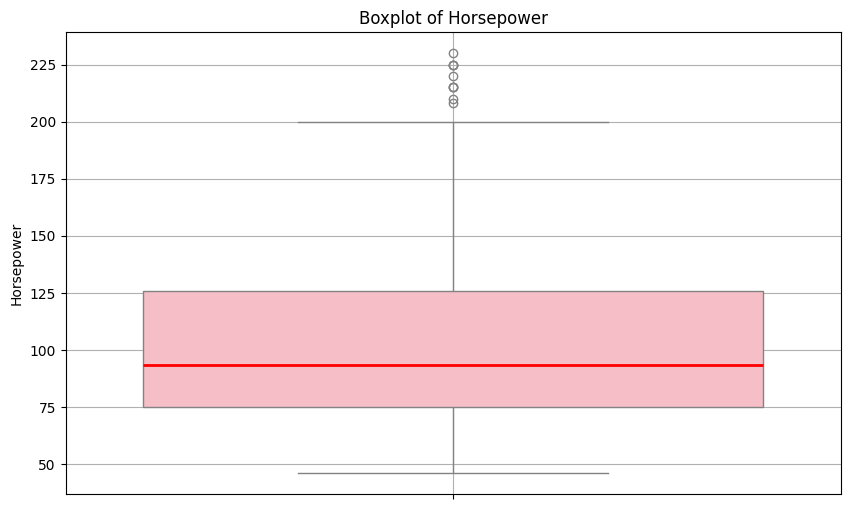

In [ ]:
# Boxplot of 'horsepower' column
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(y=df['horsepower'].dropna(), color="lightpink", medianprops=dict(color="red", linewidth=2))  # Create boxplot
plt.ylabel('Horsepower')  # Y-axis label
plt.title('Boxplot of Horsepower')  # Title of the boxplot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the boxplot

In [ ]:
# Calculate median value to confirm position of median line in box plot above
df['horsepower'].dropna().median()

93.5

## Violin Plots

A **violin plot** combines aspects of a **boxplot and a density plot**, making it useful for visualizing **distribution, spread, skewness, and multimodality** in a dataset, especially when comparing multiple groups. It provides more insight into data distribution than a box plot alone.

| Parameter | Description |
| --- | --- |
| **X-axis** | Represents categories (if applicable) |
| **Y-axis** | Represents the variable’s range and distribution |
| **Kernel Density Estimation (KDE) Shape** | A mirrored density plot on both sides of the central axis, showing the distribution of data |
| **Median Line** | A horizontal line inside the violin representing the median |
| **Inner Box (Optional)** | Some violin plots include a mini boxplot inside to highlight quartiles and spread |
| **Width of the Violin** | Indicates data density; wider sections mean more frequent values |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import matplotlib.pyplot as plt  # Import matplotlib for visualization

### Violin Plot Visualization

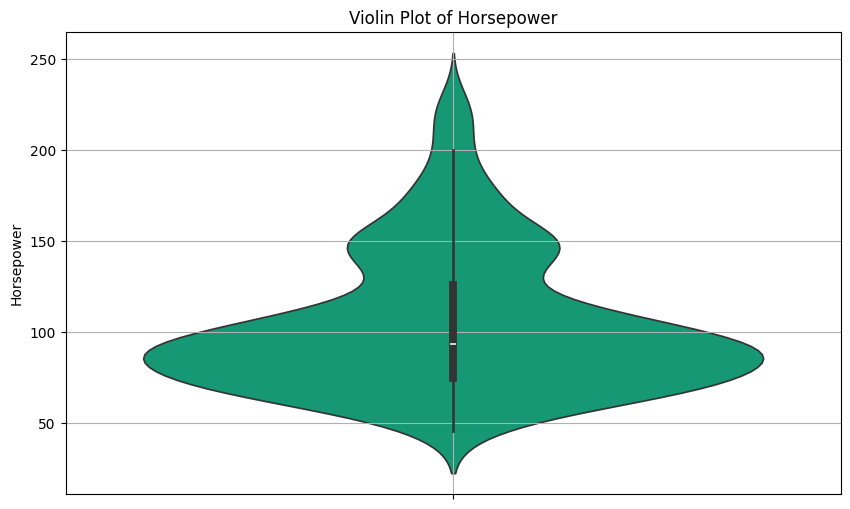

In [ ]:
# Violin plot of 'horsepower' column
plt.figure(figsize=(10, 6))  # Set figure size
sns.violinplot(y=df['horsepower'].dropna(), color="#00ae7d")  # Create violin plot
plt.ylabel('Horsepower')  # Y-axis label
plt.title('Violin Plot of Horsepower')  # Title of the violin plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the violin plot

## Bar Plot

A **barplot** is useful for **visualizing categorical data**, showing **frequency distributions**, **comparisons between groups**, and **patterns or trends** in a dataset. Unlike histograms, which are for continuous data, barplots summarize discrete categories.

| Parameter | Description |
| --- | --- |
| **X-axis** | Represents categories or discrete values |
| **Y-axis** | Represents the frequency, count, or another metric (e.g., mean, sum) for each category |
| **Bars** | Rectangles of varying heights corresponding to the values they represent |
| **Labels** | Category names on the x-axis and numerical values on the y-axis |
| **Color (Optional)** | Can be used to differentiate categories or highlight comparisons |

### Importing `mpg` Dataset

In [ ]:
import seaborn as sns  # Import the seaborn library to load the dataset
import matplotlib.pyplot as plt  # Import matplotlib for visualization

### Bar Plot Visualization

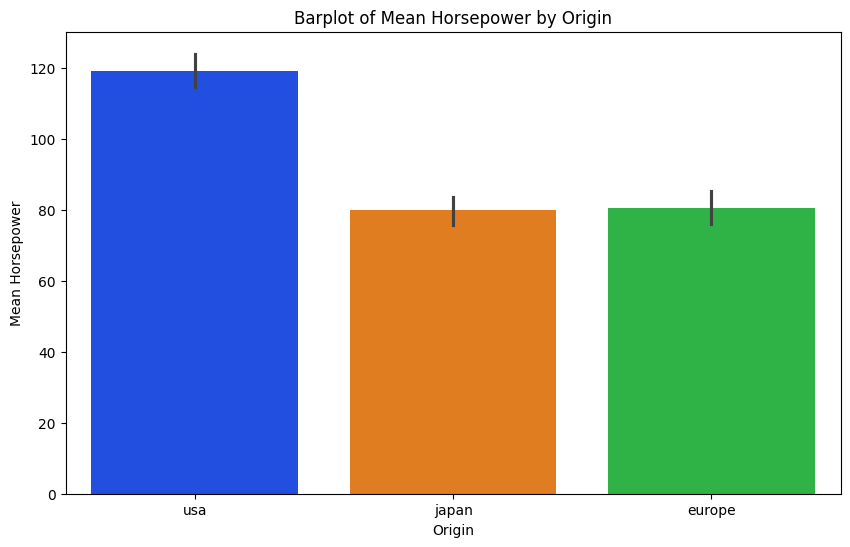

In [66]:
# Barplot of 'origin' vs. 'horsepower' (Mean Horsepower)
plt.figure(figsize=(10, 6))  # Set figure size

# Create bar plot, explicitly map colors to 'origin' categories
# so each bar will have a different color in the 'bright' palette
sns.barplot(data=df, x='origin', y='horsepower', estimator=np.mean, hue='origin', palette='bright')

# Add axis labels and chart title
plt.xlabel('Origin')  # X-axis label
plt.ylabel('Mean Horsepower')  # Y-axis label
plt.title('Barplot of Mean Horsepower by Origin')  # Title of the barplot

# plt.grid(True)  # Add grid for better readability
plt.show()  # Display the barplot

In [63]:
# Confirm there are 3 unique categories in 'origin' (to match the 3 bar colors)
len(df['origin'].unique())

3

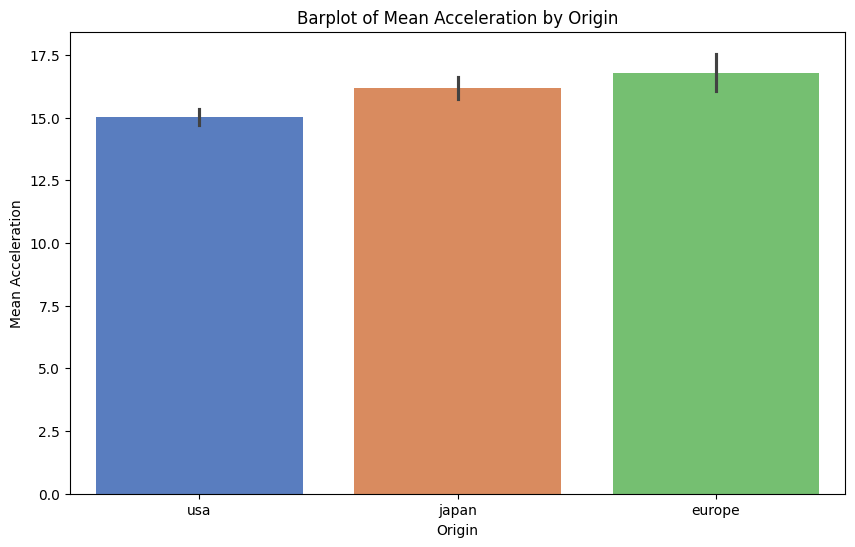

In [65]:
# Barplot of 'origin' vs. 'acceleration' (Mean Acceleration)
plt.figure(figsize=(10, 6))  # Set figure size

# Create bar plot, explicitly map colors to 'origin' categories
# so each bar will have a different color in the 'muted' palette
sns.barplot(data=df, x='origin', y='acceleration', estimator=np.mean, hue='origin', palette='muted')

# Add axis labels and chart title
plt.xlabel('Origin')  # X-axis label
plt.ylabel('Mean Acceleration')  # Y-axis label
plt.title('Barplot of Mean Acceleration by Origin')  # Title of the barplot

# plt.grid(True)  # Add grid for better readability
plt.show()  # Display the barplot

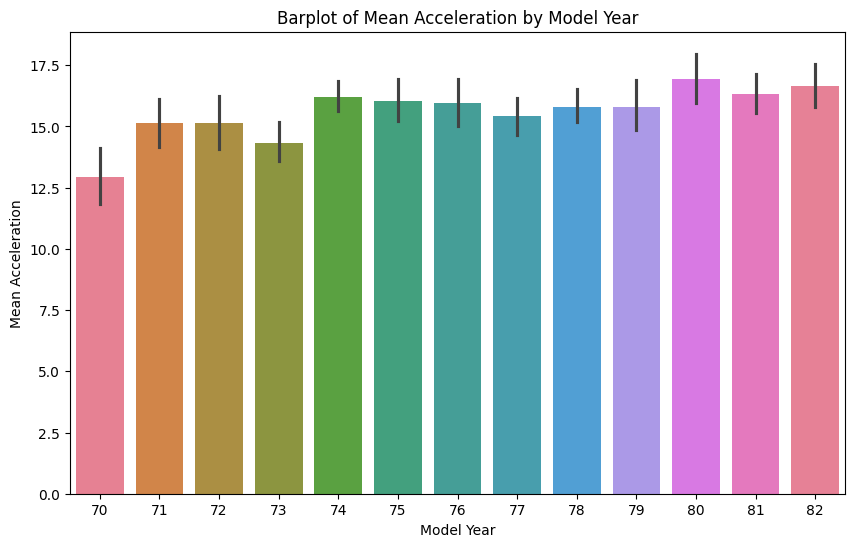

In [71]:
# Barplot of 'model_year' vs. 'acceleration'
plt.figure(figsize=(10, 6))  # Set figure size

# Create bar plot, explicitly map colors to 'model_year' categories
# so each bar will have a different color in the 'husl' palette.
# Set legend to False to surpress the legend box
sns.barplot(data=df, x='model_year', y='acceleration', estimator=np.mean, hue='model_year', palette='husl', legend=False)

# Add axis labels and chart title
plt.xlabel('Model Year')  # X-axis label
plt.ylabel('Mean Acceleration')  # Y-axis label
plt.title('Barplot of Mean Acceleration by Model Year')  # Title of the barplot

# plt.grid(True)  # Add grid for better readability
plt.show()  # Display the barplot

## Line Plot

A **line plot** is particularly useful for **tracking trends over time**, identifying **seasonal patterns, cyclic behavior, or abrupt changes** in data. It’s widely used in **time series analysis** to monitor the evolution of a variable.

| Parameter | Description |
| --- | --- |
| **X-axis** | Represents an independent variable, often time or a sequential category.  
| **Y-axis** | Represents the dependent variable being measured |
| **Data Points** | Individual observations plotted on the graph |
| **Connecting Line** | A continuous line linking data points to show trends or patterns |
| **Markers (Optional)** | Small symbols on data points to highlight their exact values |

### Generating Synthetic Time Series Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for a line plot
np.random.seed(111)  # Set seed for reproducibility
data = pd.DataFrame({
    'Time': np.arange(1, 101),  # Time steps from 1 to 100
    'Value': np.cumsum(np.random.randn(100))  # Cumulative sum of random values
})

### Line Plot Visualization

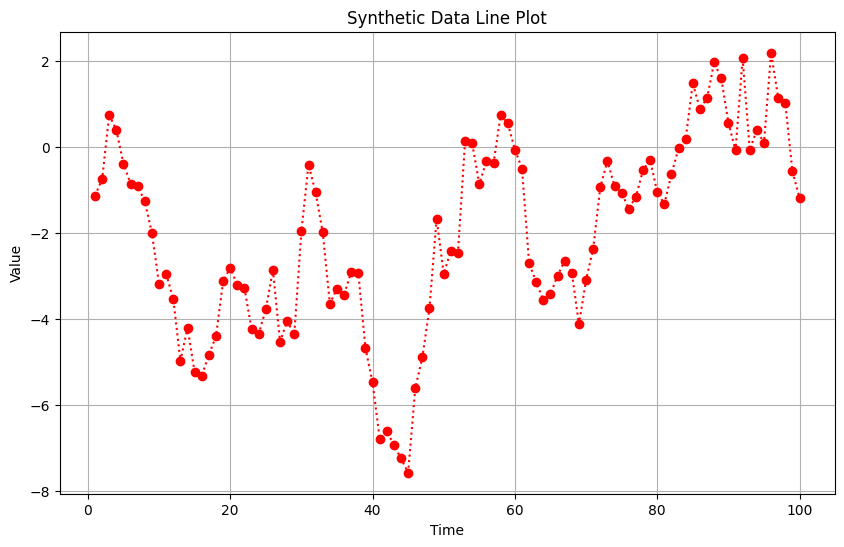

In [92]:
# Line plot of synthetic data
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data['Time'], data['Value'], marker='o', linestyle=':', color='r')  # Line plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Value')  # Y-axis label
plt.title('Synthetic Data Line Plot')  # Title of the line plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the line plot

## Univariate Analysis on the `mpg` Dataset

### Importing `mpg` Dataset

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mpg = sns.load_dataset('mpg')

### Summarize `mpg` Dataset

In [94]:
print("Summary Statistics:")
print(mpg.describe())

Summary Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### Check for Missing Values

In [95]:
print("Missing Values:")
print(mpg.isnull().sum())

Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


### Visualize Distribution of Numerical Variables

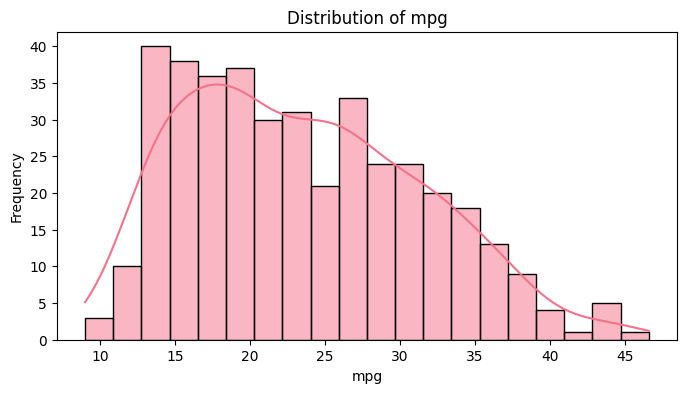

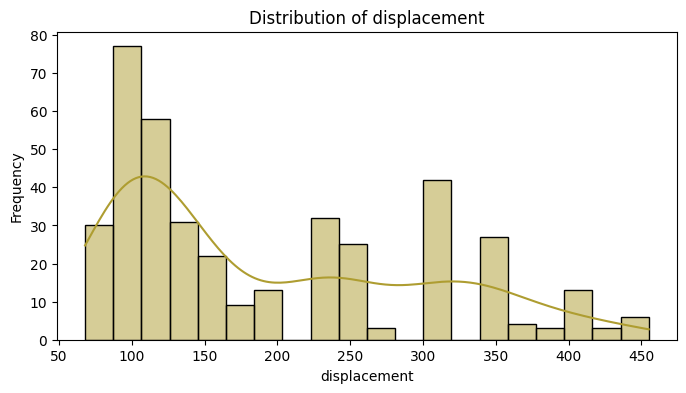

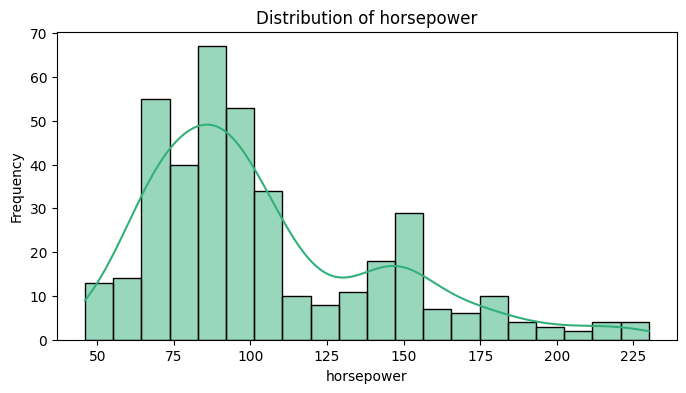

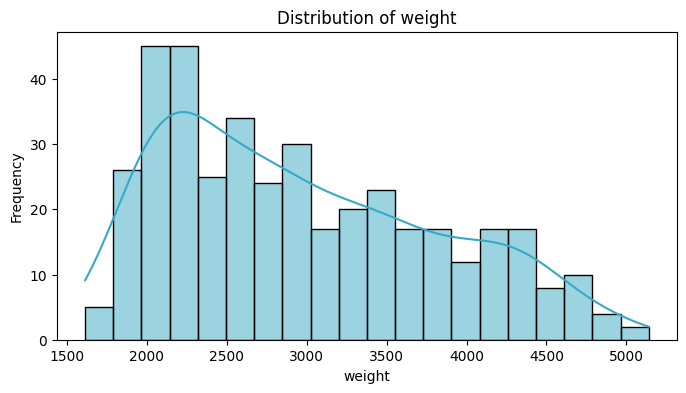

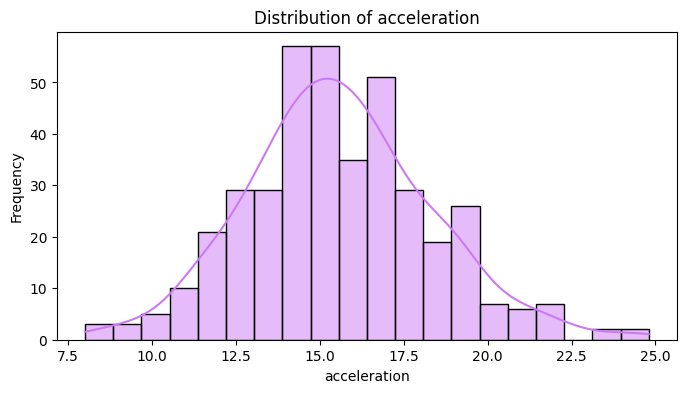

In [97]:
# Create a list of numerical variable column names
numerical_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Generate a list of distinct colors from the 'husl' palette,
# one for each numerical variable
colors = sns.color_palette("husl", len(numerical_cols))

# enumerate() returns both the index and the item, and
# index is used to select matching color from colors list
# kde=True overlays a smooth Kernel Density Estimate curve over histogram
for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 4))
    sns.histplot(mpg[col], bins=20, kde=True, color=colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Visualize Outliers of Numerical Variables

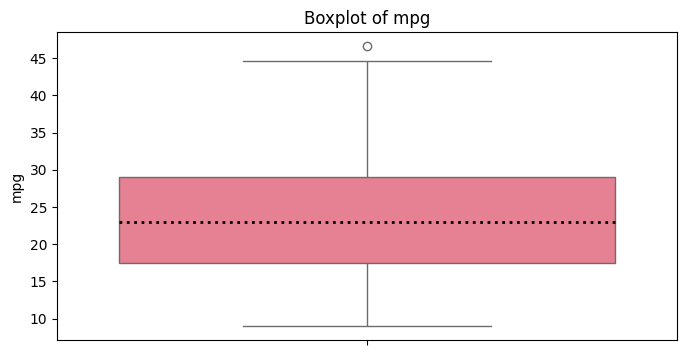

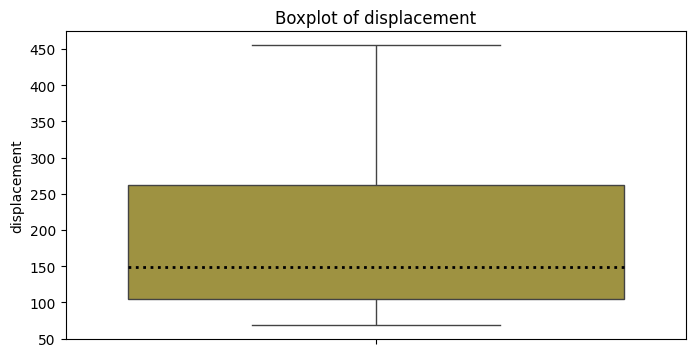

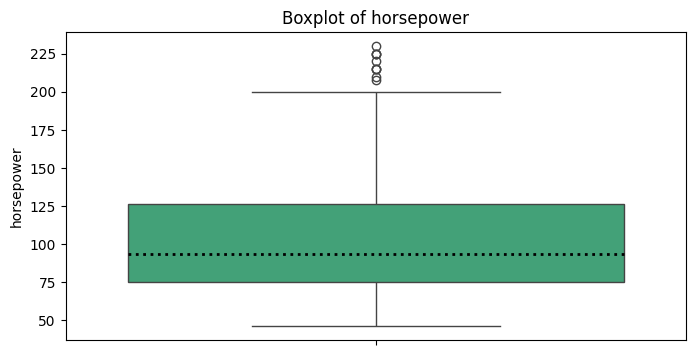

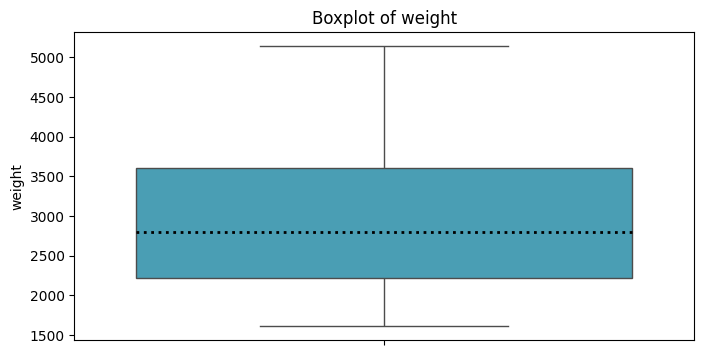

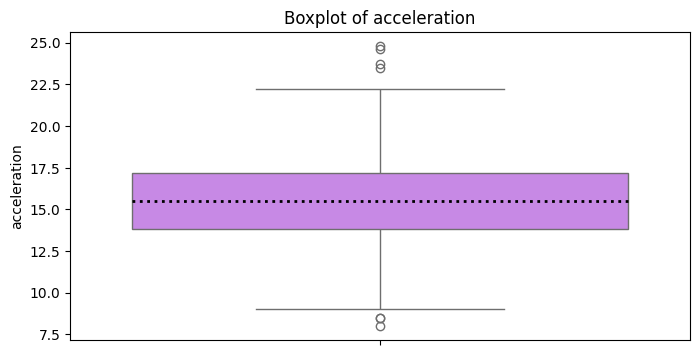

In [100]:
# Create a list of numerical variable column names
numerical_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Generate a list of distinct colors from the 'husl' palette,
# one for each numerical variable
colors = sns.color_palette("husl", len(numerical_cols))

# enumerate() returns both the index and the item, and
# index is used to select matching color from colors list
for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=mpg[col], color=colors[i], medianprops=dict(color="black", linestyle=':', linewidth=2))
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

### Visualize Distribution of Categorical Variables

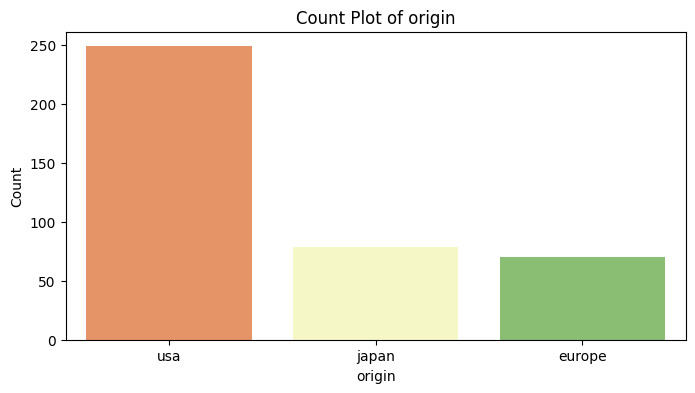

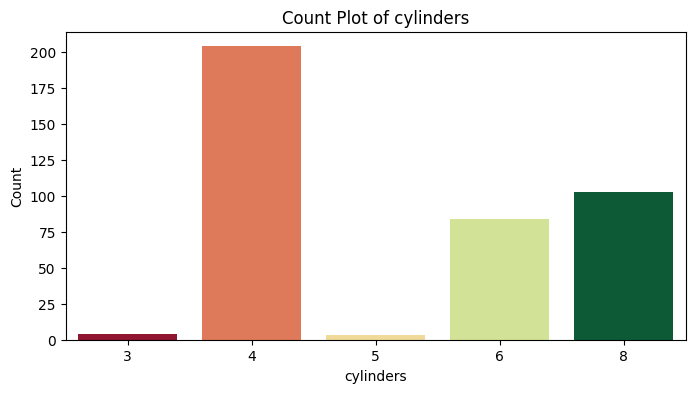

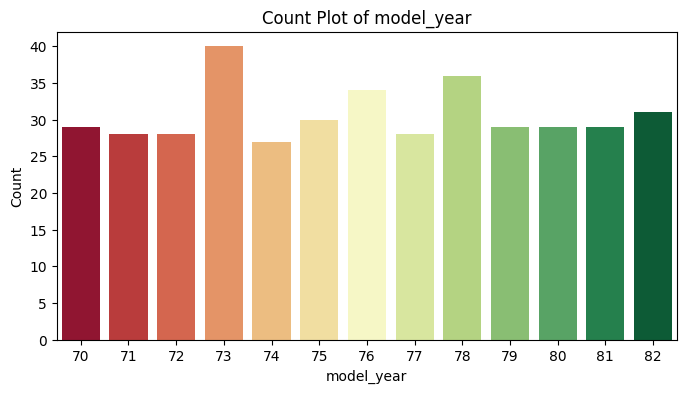

In [105]:
# Create a list of categorical variable column names
categorical_cols = ['origin', 'cylinders', 'model_year']

# Loop through each categorical variable and create a count plot
# hue=col ensures each category is assigned a distinct color from the 'RdYlGn' Brewer palette
# legend=False hides the redundant legend
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=mpg, x=col, hue=col, palette='RdYlGn', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()